------------------------------------------------------------------------------------------------------------
Sexratio = 0.25
Expected Ratio:  0.875
Expected Teta = 4*Ne*mu =  1.875e-05

Number of simulations:  403
Median Ratio:  0.9269212870809194
Median Pi Autosome:  9.22038e-06



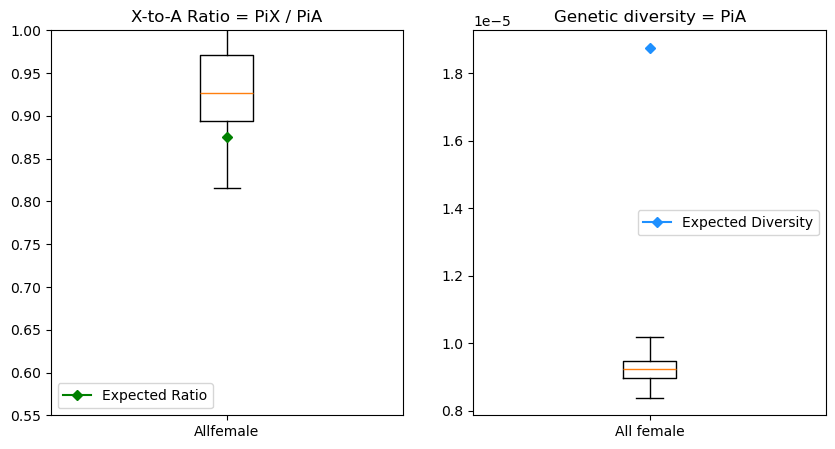

------------------------------------------------------------------------------------------------------------
Sexratio = 0.4
Expected Ratio:  0.8
Expected Teta = 4*Ne*mu =  2.4e-05

Number of simulations:  413
Median Ratio:  0.8794779885485743
Median Pi Autosome:  1.0956e-05



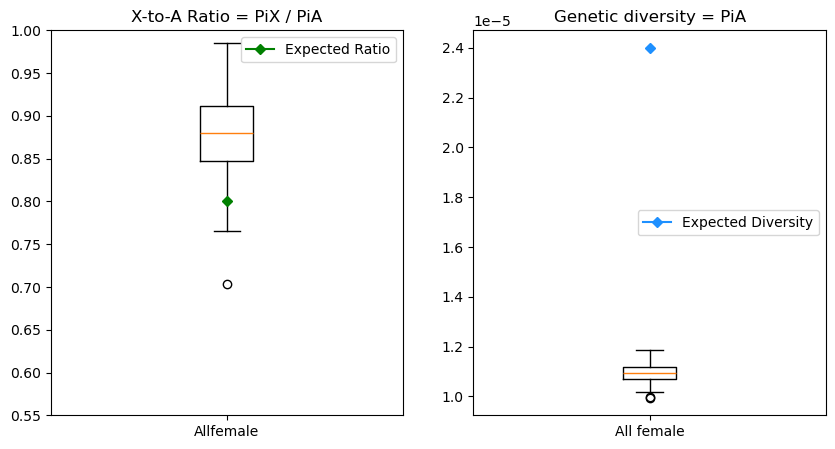

------------------------------------------------------------------------------------------------------------
Sexratio = 0.5
Expected Ratio:  0.75
Expected Teta = 4*Ne*mu =  2.5e-05

Number of simulations:  410
Median Ratio:  0.8448315712958363
Median Pi Autosome:  1.1240699999999999e-05



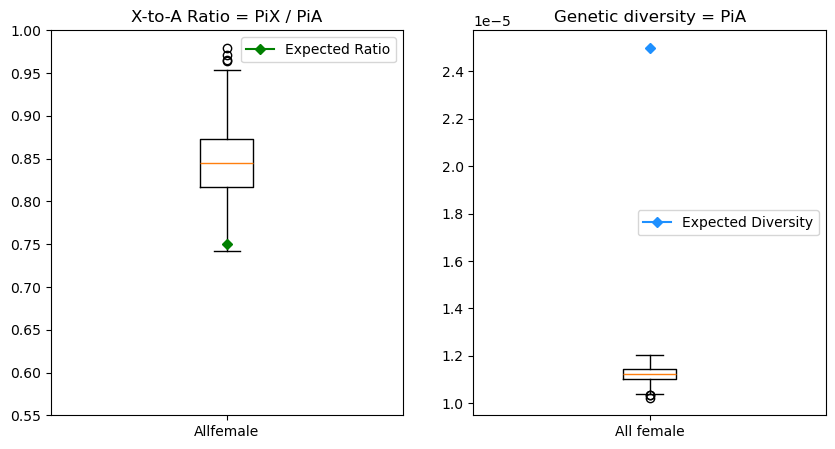

------------------------------------------------------------------------------------------------------------
Sexratio = 0.6
Expected Ratio:  0.7
Expected Teta = 4*Ne*mu =  2.4e-05

Number of simulations:  394
Median Ratio:  0.8149014199155067
Median Pi Autosome:  1.0912949999999999e-05



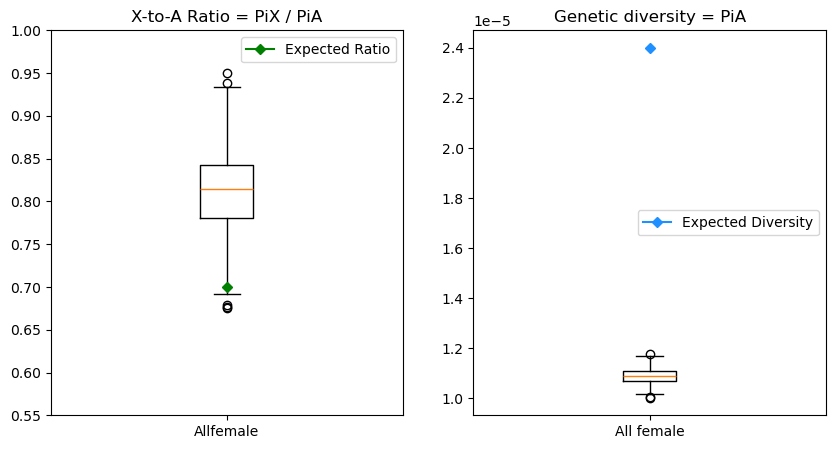

------------------------------------------------------------------------------------------------------------
Sexratio = 0.75
Expected Ratio:  0.625
Expected Teta = 4*Ne*mu =  1.875e-05

Number of simulations:  408
Median Ratio:  0.7283706860507505
Median Pi Autosome:  8.684930000000001e-06



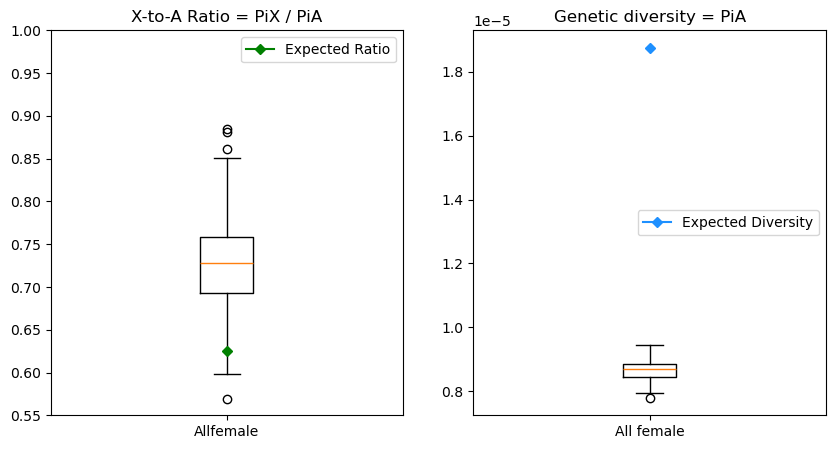

In [19]:
# Wright Fisher model
import matplotlib.pyplot as mp
import numpy as np
import os 

FOLDER = "/mnt/primevo/work/timothe_dandoy/SLiM_Project/tmp/NWFwithageallfemale/"
LSexRatio = [0.25,0.4,0.5,0.6,0.75]
for SR in LSexRatio:
    WF_Pi_ratio = []
    WF_PiA = []
    for NUM in range(1,501):
        File = FOLDER+"Allfemale_SEXRATIO:"+str(SR)+","+str(NUM)+".txt"
        if os.path.isfile(File):
            Text = open(File, 'r')
            Values = Text.read().split()
            if len(Values) > 0:
                WF_Pi_ratio.append(float(Values[1])/float(Values[0]))
                WF_PiA.append(float(Values[0]))
                Text.close()
    
    expected_ratio = 1-SR*0.5
    Ne = 4*500*(1-SR)*SR   # Ne = 4*Nm*Nf/N  => Ne = 4*N*(1-SR)*SR 
    expected_teta = round (4*Ne*1.25e-8,10)
    WF_median = np.median(WF_Pi_ratio)
    WF_PiA_median = np.median(WF_PiA)
    print("------------------------------------------------------------------------------------------------------------")
    print("Sexratio = "+str(SR))
    print("Expected Ratio: ",expected_ratio)
    print("Expected Teta = 4*Ne*mu = ", expected_teta )
    print()
    print("Number of simulations: ",len(WF_Pi_ratio))
    print("Median Ratio: ",WF_median)
    print("Median Pi Autosome: ",WF_PiA_median)
    print()

    fig, ax = mp.subplots(1,2,figsize=(10, 5))
    ax[0].boxplot([WF_Pi_ratio],tick_labels=["Allfemale"])
    ax[0].set_title("X-to-A Ratio = PiX / PiA")
    ax[0].plot(1, expected_ratio, marker='D', color='green', markersize=5, label='Expected Ratio')
    ax[0].set_ylim([0.55, 1])
    ax[0].legend()

    ax[1].boxplot([WF_PiA],tick_labels=["All female"])
    ax[1].set_title("Genetic diversity = PiA")
    ax[1].plot(1, expected_teta, marker='D', color='dodgerblue', markersize=5, label='Expected Diversity')
    ax[1].legend()


    mp.show()